In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium.vector_layers
import dash

In [3]:
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,normalize
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score

In [ ]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv')
df.head(10)

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
labels=df.Class.unique()
labels

array([0, 1])

In [ ]:
nlabels=df.Class.nunique()
nlabels

2

In [ ]:
sizes=df.Class.value_counts().values
sizes

array([284315,    492])

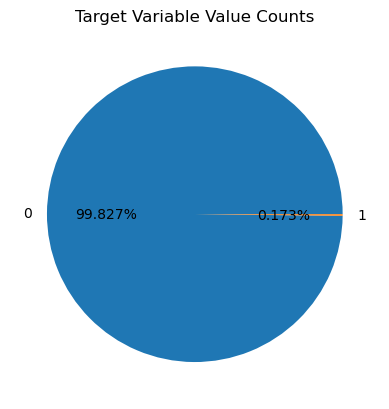

In [ ]:
fig,ax=plt.subplots()
ax.pie(sizes,labels=labels,autopct="%1.3f%%")
ax.set_title('Target Variable Value Counts')
plt.show()

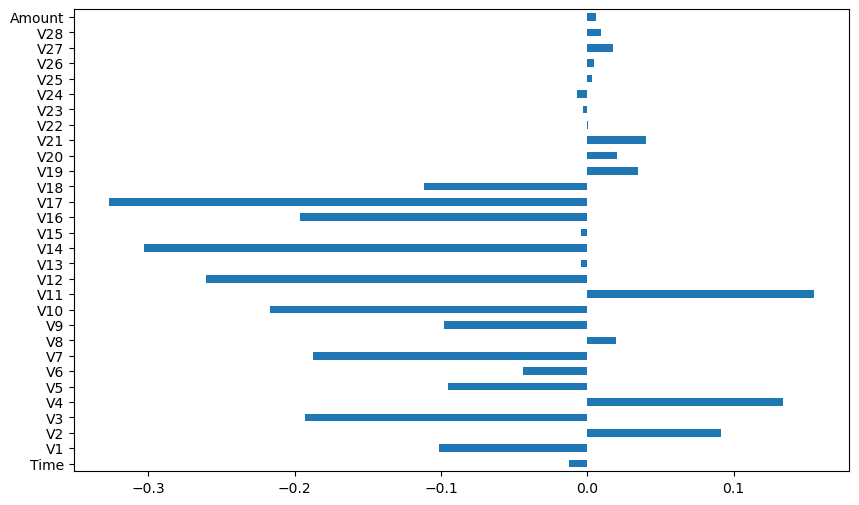

In [ ]:
correlation_values=df.corr()['Class'].drop('Class')
correlation_values.plot(kind='barh',figsize=(10,6))
plt.show()

In [ ]:
ss=StandardScaler()
df.iloc[:,1:30]=ss.fit_transform(df.iloc[:,1:30])
data_matrix=df.values
data_matrix


array([[ 0.00000000e+00, -6.94242321e-01, -4.40749246e-02, ...,
        -6.37811507e-02,  2.44964263e-01,  0.00000000e+00],
       [ 0.00000000e+00,  6.08496328e-01,  1.61175920e-01, ...,
         4.46075177e-02, -3.42474541e-01,  0.00000000e+00],
       [ 1.00000000e+00, -6.93500463e-01, -8.11577826e-01, ...,
        -1.81020827e-01,  1.16068593e+00,  0.00000000e+00],
       ...,
       [ 1.72788000e+05,  9.80023736e-01, -1.82433725e-01, ...,
        -8.04671974e-02, -8.18393021e-02,  0.00000000e+00],
       [ 1.72788000e+05, -1.22755392e-01,  3.21250341e-01, ...,
         3.16686777e-01, -3.13248531e-01,  0.00000000e+00],
       [ 1.72792000e+05, -2.72330934e-01, -1.14898979e-01, ...,
         4.13499858e-02,  5.14355311e-01,  0.00000000e+00]],
      shape=(284807, 31))

In [ ]:
x=data_matrix[:,1:30]
x

array([[-0.69424232, -0.04407492,  1.6727735 , ...,  0.33089162,
        -0.06378115,  0.24496426],
       [ 0.60849633,  0.16117592,  0.1097971 , ..., -0.02225568,
         0.04460752, -0.34247454],
       [-0.69350046, -0.81157783,  1.16946849, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 0.98002374, -0.18243372, -2.14320514, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [-0.12275539,  0.32125034,  0.46332013, ...,  0.26960398,
         0.31668678, -0.31324853],
       [-0.27233093, -0.11489898,  0.46386564, ..., -0.00598394,
         0.04134999,  0.51435531]], shape=(284807, 29))

In [ ]:
y=data_matrix[:,30]
y

array([0., 0., 0., ..., 0., 0., 0.], shape=(284807,))

In [ ]:
X=normalize(x,norm='l1')
X

array([[-0.05617142, -0.00356612,  0.13534477, ...,  0.02677257,
        -0.00516056,  0.01982016],
       [ 0.0617268 ,  0.01634993,  0.01113799, ..., -0.00225765,
         0.00452505, -0.03474114],
       [-0.02686875, -0.0314435 ,  0.0453095 , ..., -0.00531318,
        -0.00701341,  0.04496923],
       ...,
       [ 0.0576644 , -0.01073436, -0.12610577, ...,  0.0006494 ,
        -0.00473467, -0.00481541],
       [-0.00560415,  0.01466604,  0.02115195, ...,  0.01230823,
         0.0144577 , -0.01430073],
       [-0.02071875, -0.00874144,  0.03529059, ..., -0.00045525,
         0.00314588,  0.03913181]], shape=(284807, 29))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
w_train=compute_sample_weight('balanced',y_train)
w_train

array([0.50089444, 0.50089444, 0.50089444, ..., 0.50089444, 0.50089444,
       0.50089444], shape=(199364,))

In [ ]:
v_train=compute_sample_weight('balanced',X_train)
v_train

array([2.14376132e+00, 2.14376132e+00, 2.14376132e+00, ...,
       2.14376132e+00, 3.99306663e-09, 2.14376132e+00], shape=(199364,))

In [ ]:
dt=DecisionTreeClassifier(max_depth=4,random_state=35)
dt

DecisionTreeClassifier(max_depth=4, random_state=35)

In [ ]:
dt.fit(X_train,y_train,sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [ ]:
svm=LinearSVC(class_weight='balanced',random_state=31,loss='hinge',fit_intercept=False)
svm.fit(X_train,y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [ ]:
y_pred_dt1=dt.predict_proba(X_test)
y_pred_dt1

array([[0.01121944, 0.98878056],
       [0.93577397, 0.06422603],
       [0.93577397, 0.06422603],
       ...,
       [0.93577397, 0.06422603],
       [0.90069104, 0.09930896],
       [0.93577397, 0.06422603]], shape=(85443, 2))

In [ ]:
y_pred_dt=dt.predict_proba(X_test)[:,1]
y_pred_dt

array([0.98878056, 0.06422603, 0.06422603, ..., 0.06422603, 0.09930896,
       0.06422603], shape=(85443,))

In [ ]:
roc_auc_dt=roc_auc_score(y_test,y_pred_dt)
print('Decision Tree ROC-AUC score:{0:.3f}'.format(roc_auc_dt))

Decision Tree ROC-AUC score:0.939


In [ ]:
y_pred_svm=svm.decision_function(X_test)
y_pred_svm

array([24.56330654, -0.42963895, -1.05986296, ..., -0.51281142,
       -0.26505244, -0.99170395], shape=(85443,))

In [ ]:
roc_auc_svm=roc_auc_score(y_test,y_pred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

SVM ROC-AUC score: 0.986


In [ ]:
correlation_values=abs(df.corr()['Class']).drop('Class')
correlation_values

Time      0.012323
V1        0.101347
V2        0.091289
V3        0.192961
V4        0.133447
V5        0.094974
V6        0.043643
V7        0.187257
V8        0.019875
V9        0.097733
V10       0.216883
V11       0.154876
V12       0.260593
V13       0.004570
V14       0.302544
V15       0.004223
V16       0.196539
V17       0.326481
V18       0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23       0.002685
V24       0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

In [ ]:
correlation_values=correlation_values.sort_values(ascending=False).head(6)
correlation_values

V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
Name: Class, dtype: float64

In [ ]:
x=data_matrix[:,[3,10,12,14,16,17]]
y=data_matrix[:,30]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=35)

In [ ]:
dtc=DecisionTreeClassifier(max_depth=4,random_state=35)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [ ]:
y_dtc=dtc.predict_proba(x_test)[:,1]
y_dtc


array([0.0003017, 0.0003017, 0.0003017, ..., 0.0003017, 0.0003017,
       0.0003017], shape=(85443,))

In [ ]:
roc_auc_dtc=roc_auc_score(y_test,y_dtc)
roc_auc_dtc

np.float64(0.905450018421617)

In [ ]:
svm=LinearSVC(class_weight='balanced',random_state=31,loss='hinge',fit_intercept=False)
svm

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [ ]:
svm.fit(x_train,y_train)

/media/pandi-kabilesh-p/Disc-1/anaconda3/envs/muruga/lib/python3.13/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [ ]:
y_pred_svm1=svm.predict(x_test)

In [ ]:
roc_auc_svm1=roc_auc_score(y_test,y_pred_svm1)
roc_auc_svm1

np.float64(0.76583820274634)